In [4]:
import nibabel as nb
import matplotlib.pyplot as plt
#import matplotlib.pylab as plt
import os.path
from os.path import isfile, join
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind
import glob as glob
%matplotlib inline

from dipy.align.reslice import reslice
from dipy.data import get_fnames
from dipy.io.image import load_nifti, save_nifti

In [5]:
PATH_DIR = join('/NAS','dumbo','protocoles','HAMSI')
mypath = join('/NAS','dumbo','protocoles','HAMSI','data_NIFTI')

In [6]:
def display_mri(data,slice=[int(1*data.shape[2]/6),int(2*data.shape[2]/6),int(3*data.shape[2]/6),int(4*data.shape[2]/6),int(5*data.shape[2]/6)],save=None,title=None,cmap="gray",vmin=-1,vmax=0.8):
    vmin=np.min(data)
    vmax=np.max(data)
    fig,axs=plt.subplots(nrows=1,ncols=5,figsize=(20,8))
    for ax in axs:
        ax.set_xticks(())
        ax.set_yticks(())
    if title:
        fig.suptitle(title)
    axs[0].imshow(data[:,:,slice[0]],cmap=cmap,vmin=vmin,vmax=vmax)
    axs[1].imshow(data[:,:,slice[1]],cmap=cmap,vmin=vmin,vmax=vmax)
    axs[2].imshow(data[:,:,slice[2]],cmap=cmap,vmin=vmin,vmax=vmax)
    axs[3].imshow(data[:,:,slice[3]],cmap=cmap,vmin=vmin,vmax=vmax)
    axs[4].imshow(data[:,:,slice[4]],cmap=cmap,vmin=vmin,vmax=vmax)
    fig.tight_layout()
    if save:
        plt.savefig(save,transparent=False)
    plt.show()

NameError: name 'data' is not defined

In [ ]:
def fct_norm(vectNDG):
   # new_NDG = [(x - np.min(vectNDG)) / (np.max(vectNDG) - np.min(vectNDG)) for x in vectNDG]
    new_NDG = (vectNDG - np.min(vectNDG))/ (np.max(vectNDG) - np.min(vectNDG))
    return(new_NDG)

# Séries T1

Import de la Table des séries T1 sur GE 

In [ ]:
table_T1 = pd.read_csv(join(PATH_DIR,"df_table_T1_GE.csv"),sep=',')
table_T1.drop_duplicates(subset ="StudyInstanceUID", keep = 'first', inplace=True)

Reslice/Resample images for MISPEL

In [ ]:
new_voxel_size=(182/152,218/188,182/156)
for file in glob.glob(join(PATH_DIR,"OurData4Mispel_T1Gado","COL_SIEMENS","Pat*_Warped_RAS.nii.gz")):
    data,affine,voxel_size = load_nifti(file,return_voxsize=True)
    data2,affine2=reslice(data,affine,voxel_size,new_voxel_size)
    save_nifti(file.replace("RAS","RAS_r"),data2,affine2)

file='/NAS/dumbo/protocoles/HAMSI/MISPEL/Data/MNI152_T1_1mm_brain_mask.nii.gz'
data,affine,voxel_size = load_nifti(file,return_voxsize=True)
data2,affine2=reslice(data,affine,voxel_size,new_voxel_size)
save_nifti(file.replace("mask","mask_r"),data2,affine2)

Création d'une fonction de normalisation des données

In [ ]:
for CPT1,LOC in enumerate(["GM","WM","LCR"]):  
    for CPT2,MET in enumerate(["raw","kde","fcm","zscore","ws"]):
        if CPT2<1 :
            classToUse=classBefore
        else : 
            classToUse=classAfter
        plt.figure();plt.clf()
        plt.plot(classToUse,RES_CHU[CPT1,CPT2,:],'r')
        plt.plot(classToUse,RES_COL[CPT1,CPT2,:],'g')
        plt.legend(['CHU', 'COL'])
        plt.title(LOC+'_'+MET)    
        plt.savefig(join(PATH_DIR,"All_patients_"+LOC+"_"+MET+".png"),transparent=False)

In [ ]:
for file in glob.glob(join(PATH_DIR,"OurData4Mispel_T1Gado","CHU_GE","Pat115*_T1Gado_CHU.nii.gz")):
    SUBJ=file[file.find("Pat"):file.find("_T1Gado_"):]
    print(file,SUBJ)
    #for CPT1,LOC in enumerate(["GM","WM","LCR"]):        
    #    MASK_CHU_DIR=join(PATH_DIR,"OurData4Mispel_T1Gado","CHU_GE","c"+str(CPT1+1)+SUBJ+"_T1Gado_CHU.nii.gz")
    #    MASK_COL_DIR=join(PATH_DIR,"OurData4Mispel_T1Gado","COL_SIEMENS","c"+str(CPT1+1)+SUBJ+"_T1Gado_COL.nii.gz")
        #mask_RAW_CHU = nb.load(MASK_CHU_DIR).get_fdata()
        #mask_RAW_COL = nb.load(MASK_COL_DIR).get_fdata()
    T1_CHU_pre = nb.load(file).get_fdata()
    T1_COL_pre = nb.load(file.replace('CHU','COL').replace('GE','SIEMENS')).get_fdata()    
    slice=[200,236,256,276,286]
    display_mri(T1_CHU_pre,slice,save=join(PATH_DIR,SUBJ+"_CHU_PRE.png"))
    display_mri(T1_COL_pre,slice,save=join(PATH_DIR,SUBJ+"_COL_PRE.png"))
    T1_CHU_post = nb.load(join(PATH_DIR,"OurData4Mispel_T1Gado","After_prettt","SS_Bia_Reg","ge",SUBJ+"_Warped_RAS_r.nii.gz")).get_fdata()
    T1_COL_post = nb.load(join(PATH_DIR,"OurData4Mispel_T1Gado","After_prettt","SS_Bia_Reg","prisma",SUBJ+"_Warped_RAS_r.nii.gz")).get_fdata()
    slice=[60,70,75,80,100]
    display_mri(T1_CHU_post,slice,save=join(PATH_DIR,SUBJ+"_CHU_POST.png"))
    display_mri(T1_COL_post,slice,save=join(PATH_DIR,SUBJ+"_COL_POST.png"))
    display_mri(fct_norm(T1_CHU_post),slice,save=join(PATH_DIR,SUBJ+"_CHU_POST_norm.png"))
    display_mri(fct_norm(T1_COL_post),slice,save=join(PATH_DIR,SUBJ+"_COL_POST_norm.png"))

In [ ]:
T1_CHU_MISPEL = nb.load(join(PATH_DIR,"OurData4Mispel_T1Gado","After_prettt","SS_Bia_Reg_OUTPUT","Model_Step2_99","Nifti","image_12","syn_image_ge_ge.nii.gz")).get_fdata()
T1_COL_MISPEL = nb.load(join(PATH_DIR,"OurData4Mispel_T1Gado","After_prettt","SS_Bia_Reg_OUTPUT","Model_Step2_99","Nifti","image_12","syn_image_prisma_prisma.nii.gz")).get_fdata()
#slice=[60,70,75,80,100]
display_mri(T1_CHU_MISPEL,slice,save=join(PATH_DIR,SUBJ+"_CHU_MISPEL.png"))
display_mri(T1_COL_MISPEL,slice,save=join(PATH_DIR,SUBJ+"_COL_MISPEL.png"))

In [ ]:
RES_CHU=np.zeros(shape=(3,5,100), dtype=np.int64, order='F')
RES_COL=np.zeros(shape=(3,5,100), dtype=np.int64, order='F')
classBefore=0
classAfter=0
for file in glob.glob(join(PATH_DIR,"OurData4Mispel_T1Gado","CHU_GE","Pat11*_T1Gado_CHU.nii.gz")):
    print(file)
    SUBJ=file[file.find("Pat"):file.find("_T1Gado_"):]
    for CPT1,LOC in enumerate(["GM","WM","LCR"]):        
        MASK_CHU_DIR=join(PATH_DIR,"OurData4Mispel_T1Gado","CHU_GE","c"+str(CPT1+1)+SUBJ+"_T1Gado_CHU.nii.gz")
        MASK_COL_DIR=join(PATH_DIR,"OurData4Mispel_T1Gado","COL_SIEMENS","c"+str(CPT1+1)+SUBJ+"_T1Gado_COL.nii.gz")
        
        mask_RAW_CHU = nb.load(MASK_CHU_DIR).get_fdata()
        mask_RAW_COL = nb.load(MASK_COL_DIR).get_fdata()
    
        T1_CHU = nb.load(file).get_fdata()
        T1_COL = nb.load(file.replace('CHU','COL').replace('GE','SIEMENS')).get_fdata()
        CHU = np.histogram(T1_CHU[mask_RAW_CHU > 0],100,[0,500])
        COL = np.histogram(T1_COL[mask_RAW_COL > 0],100,[0,500])
        RES_CHU[CPT1,0,:]+=CHU[0];
        RES_COL[CPT1,0,:]+=COL[0];
        plt.figure();plt.clf()
        plt.plot((CHU[1][:-1]+CHU[1][1:])/2,CHU[0],'r')
        plt.plot((COL[1][:-1]+COL[1][1:])/2,COL[0],'b')
        plt.legend(['CHU', 'COL'])
        classBefore=(CHU[1][:-1]+CHU[1][1:])/2
        plt.title(LOC+' PRE '+SUBJ)
        plt.savefig(join(PATH_DIR,SUBJ+"_"+LOC+"_PRE.png"),transparent=False)

        for CPT2,MET in enumerate(["kde","fcm"]):#,"zscore","ws"]):
            print(file.replace('CHU_GE','After_prettt/'+MET).replace('CHU.nii','COL_'+MET+'.nii'))
            T1_CHU = nb.load(file.replace('CHU_GE','After_prettt/'+MET).replace('CHU.nii','CHU_'+MET+'.nii')).get_fdata()
            T1_COL = nb.load(file.replace('CHU_GE','After_prettt/'+MET).replace('CHU.nii','COL_'+MET+'.nii')).get_fdata()
            COL = np.histogram(T1_COL[mask_RAW_COL > 0],100,[-2,2])
            CHU = np.histogram(T1_CHU[mask_RAW_CHU > 0],100,[-2,2])
            #print(np.max(CHU[0]),np.max(RES_CHU[CPT1,1+CPT2,:]))
            #print(np.max(COL[0]),np.max(RES_COL[CPT1,1+CPT2,:]))
            RES_CHU[CPT1,1+CPT2,:]+=CHU[0];
            RES_COL[CPT1,1+CPT2,:]+=COL[0];
            #print(np.max(CHU[0]),np.max(RES_CHU[CPT1,1+CPT2,:]))
            #print(np.max(COL[0]),np.max(RES_COL[CPT1,1+CPT2,:]))
            plt.figure();plt.clf()
            plt.plot((CHU[1][:-1]+CHU[1][1:])/2,CHU[0],'r')            
            plt.plot((COL[1][:-1]+COL[1][1:])/2,COL[0],'b')
            plt.legend(['CHU', 'COL'])            
            classAfter=(CHU[1][:-1]+CHU[1][1:])/2
            plt.title(LOC+" "+MET+" "+SUBJ)
            plt.savefig(join(PATH_DIR,SUBJ+"_"+LOC+"_"+MET+".png"),transparent=False)
            plt.figure();plt.clf()
            plt.plot(classAfter,RES_CHU[0,1+CPT2,:],'r')
            plt.plot(classAfter,RES_COL[0,1+CPT2,:],'g')
            plt.legend(['CHU', 'COL'])
            plt.title(LOC+" "+MET)
            plt.savefig(join(PATH_DIR,LOC+"_"+MET+".png"),transparent=False)

In [ ]:
RES_CHU_SAVE=RES_CHU
RES_COL_SAVE=RES_COL
np.save(join(PATH_DIR,"RES_CHU.npy"),RES_CHU)
np.save(join(PATH_DIR,"RES_COL.npy"),RES_COL)

In [ ]:
    COL = np.histogram(fct_norm(T1_RAW_COL[mask_RAW_COL > 0]),50,[0,1])
    CHU = np.histogram(fct_norm(T1_RAW_CHU[mask_RAW_CHU > 0]),50,[0,1])
    plt.plot((COL[1][:-1]+COL[1][1:])/2,COL[0],'b')
    plt.plot((CHU[1][:-1]+CHU[1][1:])/2,CHU[0],'r.')

In [ ]:
T1_ZSCORE_CHU = nb.load(T1_ZSCORE_CHU_DIR).get_fdata()
T1_ZSCORE_COL = nb.load(T1_ZSCORE_COL_DIR).get_fdata()
COL = np.histogram(T1_ZSCORE_COL[mask_RAW_COL > 0],50,[-5,5])
CHU = np.histogram(T1_ZSCORE_CHU[mask_RAW_CHU > 0],50,[-5,5])
plt.plot((COL[1][:-1]+COL[1][1:])/2,COL[0],'b')
plt.plot((CHU[1][:-1]+CHU[1][1:])/2,CHU[0],'r.')

In [ ]:
fig, ax = plt.subplots()
plt.title('matiere grise')
plt.plot(COL,'*')

In [ ]:
MyHist_T1MG = 0
MyHist_T1MB = 0
MyHist_T1LCR = 0

MyHist_T1MG_norm = 0
MyHist_T1MB_norm = 0
MyHist_T1LCR_norm = 0

for x in table_T1['StudyInstanceUID']:
    image_T1 = nb.load(join(mypath,x,'T1.nii.gz')).get_fdata()
    image_T1_norm = fct_norm(image_T1)
    
    mask_T1MG = nb.load(join(mypath,x,'c1T1.nii.gz')).get_fdata()
    mask_T1MB = nb.load(join(mypath,x,'c2T1.nii.gz')).get_fdata()
    mask_T1LCR = nb.load(join(mypath,x,'c3T1.nii.gz')).get_fdata()
    
    TMP_T1MG = np.histogram(image_T1[mask_T1MG > 0],50,[0,500])
    TMP_T1MB = np.histogram(image_T1[mask_T1MB > 0],50,[0,500])
    TMP_T1LCR = np.histogram(image_T1[mask_T1LCR > 0],50,[0,500])
    
    TMP_T1MG_norm = np.histogram(image_T1_norm[mask_T1MG > 0],50,[0,1])
    TMP_T1MB_norm = np.histogram(image_T1_norm[mask_T1MB > 0],50,[0,1])
    TMP_T1LCR_norm = np.histogram(image_T1_norm[mask_T1LCR > 0],50,[0,1])
        
    MyHist_T1MG += TMP_T1MG[0]
    MyHist_T1MB += TMP_T1MB[0]
    MyHist_T1LCR += TMP_T1LCR[0]
    
    MyHist_T1MG_norm = TMP_T1MG_norm[0]
    MyHist_T1MB_norm = TMP_T1MB_norm[0]
    MyHist_T1LCR_norm = TMP_T1LCR_norm[0]

In [ ]:
np.histogram(np.reshape(image_T1,(1,-1)))

In [ ]:
plt.hist(np.reshape(image_T1,(1,-1)))

In [ ]:
plt.hist(np.reshape(image_T1_norm,(1,-1)))

In [ ]:
for cpt,val in enumerate(MyHist_T1MG):
    print(val,(cpt*10)+5)



































Affichage des graphiques 

In [ ]:
fig, ax = plt.subplots()
plt.title('matiere grise')
plt.plot(MyHist_T1MG,'*')

fig, ax = plt.subplots()
plt.title('matiere blanche')
plt.plot(MyHist_T1MB,'*')

fig, ax = plt.subplots()
plt.title('LCR')
plt.plot(MyHist_T1LCR,'*')

In [ ]:
fig, ax = plt.subplots()
plt.title('matiere grise')
plt.plot(new_MyHist_T1MG,'*')

fig, ax = plt.subplots()
plt.title('matiere blanche')
plt.plot(new_MyHist_T1MB,'*')

fig, ax = plt.subplots()
plt.title('LCR')
plt.plot(new_MyHist_T1LCR,'*')

# Séries T1 Gado

Import de la table des séries T1 Gado sur GE

In [7]:

































table_T1Gado = pd.read_csv(join(PATH_DIR,"df_table_T1Gado_GE.csv"),sep=',')
table_T1Gado.drop_duplicates(subset ="StudyInstanceUID", keep = 'first', inplace=True)

In [8]:
MyHist_T1GadoMG = 0
MyHist_T1GadoMB = 0
MyHist_T1GadoLCR = 0

for x in table_T1Gado['StudyInstanceUID']:
    
    if os.path.exists(join(mypath,x,'T1.nii.gz')) == True :
        image_T1Gado = nb.load(join(mypath,x,'T1Gado_r.nii.gz')).get_fdata()
    
        mask_T1GadoMG = nb.load(join(mypath,x,'c1T1.nii.gz')).get_fdata()
        mask_T1GadoMB = nb.load(join(mypath,x,'c2T1.nii.gz')).get_fdata()
        mask_T1GadoLCR = nb.load(join(mypath,x,'c3T1.nii.gz')).get_fdata()
        
    else : 
        image_T1Gado = nb.load(join(mypath,x,'T1Gado.nii.gz')).get_fdata()
    
        mask_T1GadoMG = nb.load(join(mypath,x,'c1T1Gado.nii.gz')).get_fdata()
        mask_T1GadoMB = nb.load(join(mypath,x,'c2T1Gado.nii.gz')).get_fdata()
        mask_T1GadoLCR = nb.load(join(mypath,x,'c3T1Gado.nii.gz')).get_fdata()
    
    TMP_T1GadoMG = np.histogram(image_T1Gado[mask_T1GadoMG > 0],50,[0,500])
    TMP_T1GadoMB = np.histogram(image_T1Gado[mask_T1GadoMB > 0],50,[0,500])
    TMP_T1GadoLCR = np.histogram(image_T1Gado[mask_T1GadoLCR > 0],50,[0,500])
    
    MyHist_T1GadoMG += TMP_T1GadoMG[0]
    MyHist_T1GadoMB += TMP_T1GadoMB[0]
    MyHist_T1GadoLCR += TMP_T1GadoLCR[0]

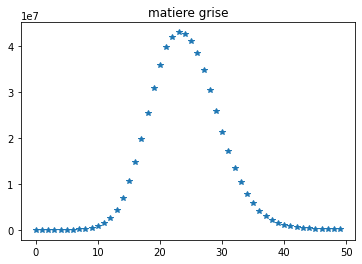

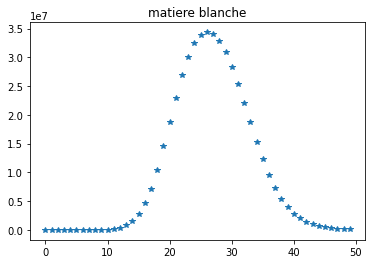

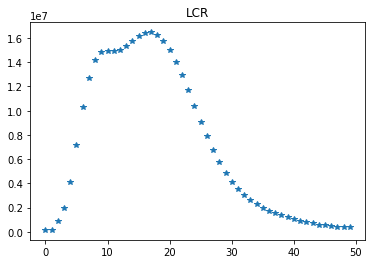

In [9]:
fig, ax = plt.subplots()
plt.title('matiere grise')
plt.plot(MyHist_T1GadoMG,'*')

fig, ax = plt.subplots()
plt.title('matiere blanche')
plt.plot(MyHist_T1GadoMB,'*')

fig, ax = plt.subplots()
plt.title('LCR')
plt.plot(MyHist_T1GadoLCR,'*')

# Séries FLAIR

Import de la table des séries FLAIR sur GE

In [49]:
table_FLAIR = pd.read_csv(join(PATH_DIR,"df_table_FLAIR_GE_2.csv"),sep=',')
table_FLAIR.drop_duplicates(subset ="StudyInstanceUID", keep = 'first', inplace=True)

In [50]:
MyHist_FLAIRMG = 0
MyHist_FLAIRMG_6800 = 0
MyHist_FLAIRMG_6000 = 0

MyHist_FLAIRMB = 0
MyHist_FLAIRMB_6800 = 0
MyHist_FLAIRMB_6000 = 0

MyHist_FLAIRLCR = 0
MyHist_FLAIRLCR_6800 = 0
MyHist_FLAIRLCR_6000 = 0

for x in table_FLAIR.index : 
    
    if os.path.exists(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'T1.nii.gz')) == True : 
        image_FLAIR = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'FLAIR_r.nii.gz')).get_fdata()
    
        mask_FLAIRMG = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c1T1.nii.gz')).get_fdata()
        mask_FLAIRMB = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c2T1.nii.gz')).get_fdata()
        mask_FLAIRLCR = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c3T1.nii.gz')).get_fdata()
    
    elif os.path.exists(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'T1Gado.nii.gz')) == True :
        image_FLAIR = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'FLAIR_r.nii.gz')).get_fdata()
    
        mask_FLAIRMG = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c1T1Gado.nii.gz')).get_fdata()
        mask_FLAIRMB = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c2T1Gado.nii.gz')).get_fdata()
        mask_FLAIRLCR = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c3T1Gado.nii.gz')).get_fdata()
        
    else : 
        image_FLAIR = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'FLAIR.nii.gz')).get_fdata()
    
        mask_FLAIRMG = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c1FLAIR.nii.gz')).get_fdata()
        mask_FLAIRMB = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c2FLAIR.nii.gz')).get_fdata()
        mask_FLAIRLCR = nb.load(join(mypath,table_FLAIR.loc[x,'StudyInstanceUID'],'c3FLAIR.nii.gz')).get_fdata()
        
    TMP_FLAIRMG = np.histogram(image_FLAIR[mask_FLAIRMG > 0],50,[0,800])
    TMP_FLAIRMB = np.histogram(image_FLAIR[mask_FLAIRMB > 0],50,[0,800])
    TMP_FLAIRLCR = np.histogram(image_FLAIR[mask_FLAIRLCR > 0],50,[0,800])

    if table_FLAIR.loc[x,'Repetition_Time'] == 6800 :
        MyHist_FLAIRMG_6800 += TMP_FLAIRMG[0]
        MyHist_FLAIRMB_6800 += TMP_FLAIRMB[0]
        MyHist_FLAIRLCR_6800 += TMP_FLAIRLCR[0]
        
    if table_FLAIR.loc[x,'Repetition_Time'] == 6000 :
        MyHist_FLAIRMG_6000 += TMP_FLAIRMG[0]
        MyHist_FLAIRMB_6000 += TMP_FLAIRMB[0]
        MyHist_FLAIRLCR_6000 += TMP_FLAIRLCR[0]
    
    MyHist_FLAIRMG += TMP_FLAIRMG[0]
    MyHist_FLAIRMB += TMP_FLAIRMB[0]
    MyHist_FLAIRLCR += TMP_FLAIRLCR[0]

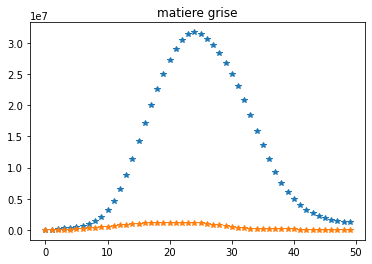

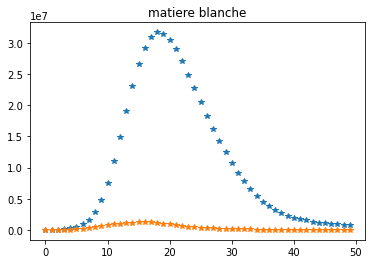

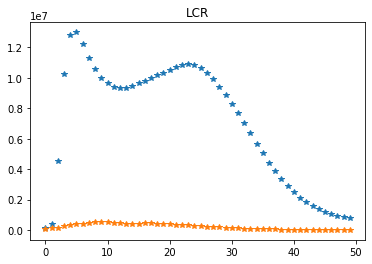

In [51]:
fig, ax = plt.subplots()
plt.title('matiere grise')
plt.plot(MyHist_FLAIRMG_6800,'*')
plt.plot(MyHist_FLAIRMG_6000,'*')
#plt.plot(MyHist_FLAIRMG,'*')

fig, ax = plt.subplots()
plt.title('matiere blanche')
plt.plot(MyHist_FLAIRMB_6800,'*')
plt.plot(MyHist_FLAIRMB_6000,'*')
#plt.plot(MyHist_FLAIRMB,'*')

fig, ax = plt.subplots()
plt.title('LCR')
plt.plot(MyHist_FLAIRLCR_6800,'*')
plt.plot(MyHist_FLAIRLCR_6000,'*')
#plt.plot(MyHist_FLAIRLCR,'*')

In [41]:
new_MyHist_FLAIRMG_6800 = [(x - np.min(MyHist_FLAIRMG_6800)) / (np.max(MyHist_FLAIRMG_6800) - np.min(MyHist_FLAIRMG_6800)) for x in MyHist_FLAIRMG_6800]
new_MyHist_FLAIRMG_6000 = [(x - np.min(MyHist_FLAIRMG_6000)) / (np.max(MyHist_FLAIRMG_6000) - np.min(MyHist_FLAIRMG_6000)) for x in MyHist_FLAIRMG_6000]

new_MyHist_FLAIRMB_6800 = [(x - np.min(MyHist_FLAIRMB_6800)) / (np.max(MyHist_FLAIRMB_6800) - np.min(MyHist_FLAIRMB_6800)) for x in MyHist_FLAIRMB_6800]
new_MyHist_FLAIRMB_6000 = [(x - np.min(MyHist_FLAIRMB_6000)) / (np.max(MyHist_FLAIRMB_6000) - np.min(MyHist_FLAIRMB_6000)) for x in MyHist_FLAIRMB_6000]

new_MyHist_FLAIRLCR_6800 = [(x - np.min(MyHist_FLAIRLCR_6800)) / (np.max(MyHist_FLAIRLCR_6800) - np.min(MyHist_FLAIRLCR_6800)) for x in MyHist_FLAIRLCR_6800]
new_MyHist_FLAIRLCR_6000 = [(x - np.min(MyHist_FLAIRLCR_6000)) / (np.max(MyHist_FLAIRLCR_6000) - np.min(MyHist_FLAIRLCR_6000)) for x in MyHist_FLAIRLCR_6000]

In [42]:
for cpt,val in enumerate(new_MyHist_FLAIRMG_6800):
    print(val,(cpt*10)+5)

0.0 5
4.0912264709019855e-06 15
0.000274112173550433 25
0.001979092923572253 35
0.004562475149587362 45
0.006992259601552929 55
0.009717521520861416 65
0.012474503072561588 75
0.015243758303674467 85
0.018129436707817335 95
0.021662084493019255 105
0.026370682089277227 115
0.03294245452576523 125
0.04224034753403092 135
0.05486334697479562 145
0.07157464336627327 155
0.09271209120061032 165
0.11843731917789178 175
0.1489816078661456 185
0.18447633109315956 195
0.22496128992632963 205
0.2704642137895142 215
0.3208453443661084 225
0.3747298780349829 235
0.4310580356132678 245
0.4889229790755485 255
0.5462261617870963 265
0.6027364547067894 275
0.6567075102391782 285
0.7085899188947183 295
0.7576816565163843 305
0.803781545881539 315
0.846284590562177 325
0.885789119802425 335
0.9207261735051769 345
0.9502379578537001 355
0.9734826398653956 365
0.990308591615996 375
0.9989617376378289 385
1.0 395
0.994596954592033 405
0.9828096765486454 415
0.9664306786627488 425
0.9457925624937369 435
0.

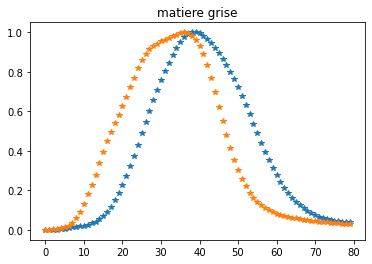

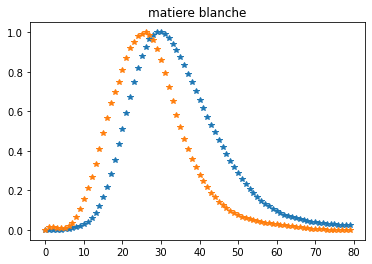

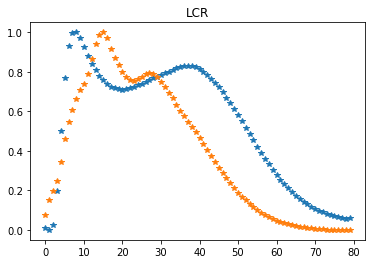

In [44]:
fig, ax = plt.subplots()
plt.title('matiere grise')
plt.plot(new_MyHist_FLAIRMG_6800,'*')
plt.plot(new_MyHist_FLAIRMG_6000,'*')
#plt.plot(MyHist_FLAIRMG,'*')

fig, ax = plt.subplots()
plt.title('matiere blanche')
plt.plot(new_MyHist_FLAIRMB_6800,'*')
plt.plot(new_MyHist_FLAIRMB_6000,'*')
#plt.plot(MyHist_FLAIRMB,'*')

fig, ax = plt.subplots()
plt.title('LCR')
plt.plot(new_MyHist_FLAIRLCR_6800,'*')
plt.plot(new_MyHist_FLAIRLCR_6000,'*')
#plt.plot(MyHist_FLAIRLCR,'*')

In [126]:
liste = [MyHist_FLAIRMG_6800, MyHist_FLAIRMG_6000, MyHist_FLAIRMB_6800, MyHist_FLAIRMB_6000, MyHist_FLAIRLCR_6800, MyHist_FLAIRLCR_6000]

In [127]:
for x in liste : 
    print(f"Moyenne : {np.mean(x)}")
    print(f"Ecart-type : {np.std(x)}")
    print('-----')

Moyenne : 12229527.72
Ecart-type : 11315423.73739549
-----
Moyenne : 457867.0
Ecart-type : 434613.17371630605
-----
Moyenne : 10416509.72
Ecart-type : 10800411.566506408
-----
Moyenne : 354105.24
Ecart-type : 418712.8166667249
-----
Moyenne : 7081612.56
Ecart-type : 4000565.408352775
-----
Moyenne : 221588.0
Ecart-type : 179469.9355767422
-----


In [128]:
t_stat, p = ttest_ind(MyHist_FLAIRMG_6800, MyHist_FLAIRMG_6000)
print(f't={t_stat}, p={p}')

t=7.276873834278118, p=8.547507236306844e-11


In [129]:
p/2

4.273753618153422e-11

# Essais

In [47]:
T1 = nb.load(join(mypath,'1.3.51.0.1.1.10.49.10.222.5982019.5982373/T1.nii.gz'))
T1_vox = T1.get_fdata()

In [60]:
print(T1)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (272, 512, 512)
affine: 
[[ 5.96786737e-01  5.17684817e-02 -5.70059940e-03 -9.40451889e+01]
 [-6.11158349e-02  4.94788319e-01  5.09029962e-02 -6.93198700e+01]
 [ 1.30949374e-02 -5.00454828e-02  4.97369468e-01 -1.24189278e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 272 512 512   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.       0.599999 0.5      0.5      0.5      0.       0.       0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max   

<OrthoSlicer3D: /NAS/dumbo/protocoles/HAMSI/data_NIFTI/1.3.51.0.1.1.10.49.10.222.5982019.5982373/T1.nii.gz (272, 512, 512)>

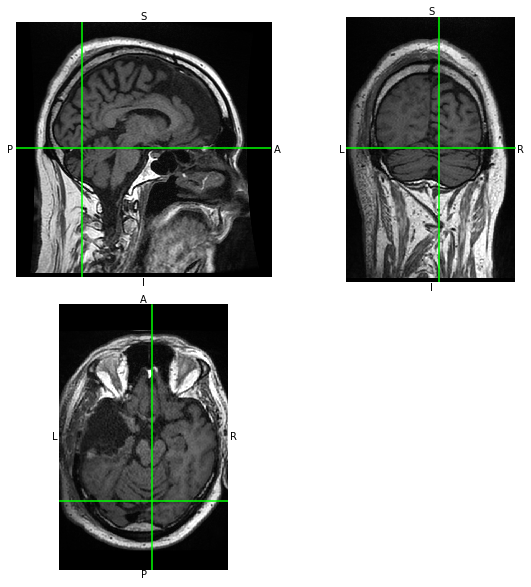

In [61]:
T1.orthoview()

In [48]:
T1_bis = nb.load(join(mypath,'1.3.51.0.1.1.10.49.10.222.5907244.5907547/T1.nii.gz')).get_fdata()

In [49]:
maskT1 = nb.load(join(mypath,'1.3.51.0.1.1.10.49.10.222.5982019.5982373/c2T1.nii.gz')).get_fdata()

In [50]:
maskT1_bis = nb.load(join(mypath,'1.3.51.0.1.1.10.49.10.222.5907244.5907547/c2T1.nii.gz')).get_fdata()

In [51]:
hist = T1_vox[maskT1 > 0]
hist_bis = T1_bis[maskT1_bis > 0]

In [52]:
np.mean(hist)

284.8445928059966

In [114]:
print(f"Min : {np.min(hist)}")
print(f"Max : {np.max(hist)}")
print(f"Moyenne : {np.mean(hist)}")
print(f"Médiane : {np.median(hist)}")
print(f"Ecart-type : {np.std(hist)}")
print(f"Ecart interquartile : {np.percentile(hist, 75) - np.percentile(hist, 25)}")

Min : 129.0
Max : 482.0
Moyenne : 284.8445928059966
Médiane : 285.0
Ecart-type : 46.811047057817895
Ecart interquartile : 69.0


(array([4.750000e+03, 1.770430e+05, 6.586650e+05, 1.269228e+06,
        1.445588e+06, 1.190484e+06, 5.980650e+05, 9.185700e+04,
        4.121000e+03, 6.300000e+01]),
 array([129. , 164.3, 199.6, 234.9, 270.2, 305.5, 340.8, 376.1, 411.4,
        446.7, 482. ]),
 <BarContainer object of 10 artists>)

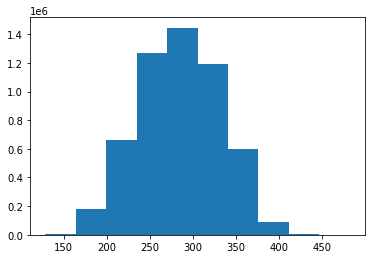

In [53]:
plt.hist(hist)

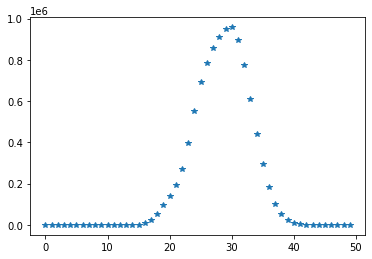

In [87]:
MyHist=np.histogram(T1_vox[maskT1 > 0],50,[0,500])

TMP=np.histogram(T1_bis[maskT1_bis > 0],50,[0,500])
MyHist=MyHist[0]+TMP[0]

plt.plot(MyHist,'*')